<a href="https://colab.research.google.com/github/oroyansarah22/CHAPTER-8/blob/main/Symbolic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

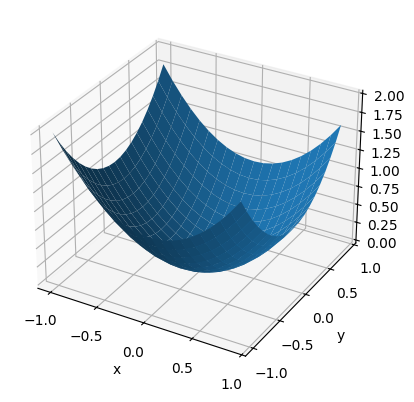

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!pip install gplearn
from gplearn.genetic import SymbolicRegressor

x = np.arange(-1, 1, 1/10.)
y = np.arange(-1, 1, 1/10.)
x, y = np.meshgrid(x, y)
f_values = x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f_values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
input_train = np.random.uniform(-1, 1, 200).reshape(100,2)
output_train = input_train[:,0]**2 + input_train[:,1]**2
input_test = np.random.uniform(-1, 1, 200).reshape(100,2)
output_test = input_test[:,0]**2 + input_test[:,1]**2

function_set = ['add', 'sub', 'mul']
sr_model = SymbolicRegressor(population_size=1000,
                             function_set = function_set,
                             generations=10,
                             stopping_criteria=0.01,
                             p_crossover=0.7, p_subtree_mutation=0.1,
                             p_hoist_mutation=0.05, p_point_mutation=0.1,
                             max_samples=0.9, verbose=1,
                             parsimony_coefficient=0.01, random_state=1)

sr_model.fit(input_train, output_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.62          1.18675        7         0.254078         0.164101      9.01s
   1     9.52         0.658067       11        0.0630719        0.0721814      6.97s
   2     6.94         0.492331        7                0                0      5.64s


SymbolicRegressor(function_set=['add', 'sub', 'mul'], generations=10,
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, random_state=1,
                  stopping_criteria=0.01, verbose=1)

In [29]:
print(sr_model._program)
print('R2:', sr_model.score(input_test, output_test))

add(mul(X1, X1), mul(X0, X0))
R2: 1.0
